# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Цель исследования** — изучение рынка российского кинопроката.

**Ход исследования**

Данные о прокатных удостверениях, выданных фильмам находятся в файле `mkrf_movies.csv`, а данные о сборах по соответствующим прокатным удостверениям `mkrf_shows.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

На этапе предобработки необходимо будет определить и обработать пропуски, проверить наличие дубликатов, привести данные в столбцах к нужным типам, оценить данные на наличие в них аномалий.

На этапе дополнения таблицы необходимо добавить столбец с информацией о годе проката, именем и фамилией главного режиссёра, основным жанром фильма и долей государственной поддержки от общего бюджета фильма.
 
Таким образом, исследование пройдёт в пять этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Расчёты и добавление результатов в таблицу.
 4. Исследовательский анализ данных.
 5. Иследование фильмов с государственной поддержкой

### Шаг 1. Объединение таблиц

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies = pd.read_csv('/datasets/mkrf_movies.csv')
movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [4]:
shows = pd.read_csv('/datasets/mkrf_shows.csv')
display(shows.head(10))

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [5]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Для объединения датафреймов надо изменить тип данных в DataFrame `movies` в столбце `puNumber` на `int`. Учитывая вероятность наличия в столбце некорректных данных, которые нельзя перевести в числовой формат данных, воспользуемся сначала методом `to_numeric` с аргументом `errors = 'coerce'` для замены некорректных значений на NaN

In [6]:
movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors='coerce')

Проверим наличие пропусков

In [7]:
movies['puNumber'].isna().sum()

1

Удалим этот пропуск

In [8]:
movies.dropna(subset=['puNumber'], inplace=True)

Переведем к целочисленному типу данных

In [9]:
movies['puNumber'] = movies['puNumber'].astype('int')

Совместим таблицы по столбцу `puNumber`

In [10]:
movies = movies.merge(shows, on='puNumber', how='left')

In [11]:
movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [12]:
movies.info()
display(movies.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
title                    7485 non-null object
puNumber                 7485 non-null int64
show_start_date          7485 non-null object
type                     7485 non-null object
film_studio              7467 non-null object
production_country       7483 non-null object
director                 7476 non-null object
producer                 6917 non-null object
age_restriction          7485 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.1+ KB


,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.485000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.351966e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.835292e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120251e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


В таблице 16 столбцов.

Согласно документации к данным:
* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения; 
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки в рублях;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки в рублях;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма;
* `box_office` — сборы в рублях.

**Замечания к данным:**
1. Пропуски в таблице в столбцах `film_studio`, `production_country`, `director`, `producer`, `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, `ratings`, `genres`, `box_office`. Исходя из данных в таблице, необходимо определить причину пропусков и по возможности заполнить их;
2. Необходимо изучить типы данных в датафрейме и преобразовать их там, где это необходимо;
3. Проверить, есть ли в данных дубликаты и удалить их;
4. Проверить категориальные значения и количественные значения в датафрейме.

**Вывод**

В каждой строке таблицы — информация о фильме по его прокатному удостверению. В столбцах находится информация о названии фильма, номере прокатного удостверения, дате премьеры, жанру, режиссёру и т.д.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Следует их предобработать, проверить наличие дубликатов и устранить проблемы в данных.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
title                    7485 non-null object
puNumber                 7485 non-null int64
show_start_date          7485 non-null object
type                     7485 non-null object
film_studio              7467 non-null object
production_country       7483 non-null object
director                 7476 non-null object
producer                 6917 non-null object
age_restriction          7485 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.1+ KB


Заменим тип данных в столбце `show_start_date` на тип datetime. Во всех записях значения округлены до дня, поэтому часы записывать не имеет смысла.

In [14]:
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format = '%Y-%m-%d')

In [15]:
movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


Можно было бы заменить вещественный тип данных на целочисленный, но в этих столбцах много пропусков, которые нельзя логично заполнить, поэтому оставим как есть.

Рассмотрим значения в столбце `ratings` и по возможности заменим тип данных на вещественный

In [17]:
movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Видим, что в наборе данных присутствуют рейтинг в %. Этот рейтинг не соответствует информации с сайта "Кинопоиск". Оценим количество строк с такими данными.

In [18]:
movies['ratings'] = pd.to_numeric(movies['ratings'], errors='coerce')

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
title                    7485 non-null object
puNumber                 7485 non-null int64
show_start_date          7485 non-null datetime64[ns, UTC]
type                     7485 non-null object
film_studio              7467 non-null object
production_country       7483 non-null object
director                 7476 non-null object
producer                 6917 non-null object
age_restriction          7485 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6490 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(9)
memory usage: 1.3+ MB


По новому количеству пропусков можно понять, что таких значений было около 45. Это величина довольно мала, поэтому значения с процентами можно просто заменить на NaN, что мы уже сделали.

**Вывод**

Произведена замена типа данных в столбце `show_start_date`. В столбце `ratings` был изменен тип данных на float с удалением "процентных" рейтингов. В остальных столбцах данные остались нетронутыми.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Заполним пропуски в категориальных данных на сигнальное значение "неизвестно" для дальнейшего удобства представления результатов

In [20]:
columns = ['film_studio', 'production_country', 'director', 'producer', 'genres']
movies[columns] = movies[columns].fillna('Неизвестно')

Значения в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, `ratings`, `box_office` заполнить как-то логически невозможно, поэтому оставим как есть.

**Вывод**

В столбцах с категориальными значениями пропуски заполнили значением "неизвестно", чтобы затем удобно было представлять эти данные. Значения в столбцах с числовыми значениями оставили нетронутыми.

#### Шаг 2.3. Изучите категориальные значения


Рассмотрим уникальные значения в каждом столбце с категориальными значениями.

In [21]:
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Видны скрытые повторы категорий из-за пробелов в начале. Исправим эти проблемные значения.

In [22]:
movies['type'] = movies['type'].apply(lambda x: x.strip())
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [23]:
movies['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

Страны производства в разных записях разделены по разному. Часть через "-", часть через ",", в части есть пробелы, а в части нет.

In [24]:
def fix_production_country(row):
    """
    Замена в столбце production_country знака разделителя с "-" на ","
    """
    production_country = row['production_country']
    if '-' in production_country:
        production_country = production_country.replace('-', ',')
    if ' ,' in production_country:
        production_country = production_country.replace(' ,', ',')
    if (',' in production_country) and (', ' not in production_country):
        production_country = production_country.replace(',', ', ')
    return production_country

In [25]:
movies['production_country'] = movies.apply(fix_production_country, axis=1)
movies['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия, Великобритания', 'Великобритания, Италия',
       'Чехословакия', 'США, Франция, Турция', 'Новая Зеландия',
       'Канада, Франция, Испания', 'США, Германия', 'США, Великобритания',
       'Великобритания', 'Франция, Мексика, США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания, США, Германия, КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США, Франция', 'США, Япония, Франция, Великобритания',
       'Гонконг, Сингапур, Таиланд, Великобритания', 'США, Канада',
       'Франция, Италия, Великобритания, США', 'Франция, США',
       'Ирландия, Великобритания, Германия', 'Чехия', 'США, Австралия',
       'СССР, Финляндия', 'США, Франция, Великобритания, Австрия',
       'США, Бельгия', 'США, Ирландия, Великобритания',
       'Великобритания, США',
       'Люксембург, Нидерланды, Испания, Великобритания,

Разделитель стандартизирован. Возможны также одинаковые страны производства, но в разном порядке, а также опечатки в названии страны, но так как в исследовании эти данные не фигурируют, это можно проигнорировать.

In [26]:
movies['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Эти данные в порядке

In [27]:
movies['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Эти данные в порядке

In [28]:
movies['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'Неизвестно', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

Жанры в порядке

**Вывод**

Были проверены категориальные значения, исправлены значения в столбцах `type` и `production_country`.

#### Шаг 2.4. Проверьте количественные значения

Проверим столбцы `refundable_support`, `nonrefundable_support`, `budget`, `ratings` и `box_office`.

In [29]:
movies['refundable_support'].describe()

count    3.320000e+02
mean     1.186446e+07
std      2.491656e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64

Данные в порядке

In [30]:
movies['nonrefundable_support'].describe()

count    3.320000e+02
mean     4.898099e+07
std      5.998012e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.037500e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64

Данные в порядке

In [31]:
movies['budget'].describe()

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

In [32]:
len(movies[movies['budget'] == 0])

17

Есть нулевые значения `budget`, что невозможно. Проверим эти значения относительно столбцов `nonrefundable_support` и `refundable_support`.

Значение в столбце `budget` должно быть больше, чем сумма невозвратной и возвратной поддержки государства. Посмотрим есть ли строки с аномальными значениями

In [33]:
movies['is_anomaly'] = ((movies['refundable_support'] + movies['nonrefundable_support']) > movies['budget'])
movies['is_anomaly'].sum()

17

Число нулевых значений в столбце `budget` совпадает с числом строк, в которых сумма государственной поддержки больше бюджета. Скорее всего эти значения совпадают. Проверим эту гипотезу.

In [34]:
movies[movies['is_anomaly']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,is_anomaly
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,True
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08,True
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,True
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,True
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,True
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,True
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,True
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07,True
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,True
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09,True


Так и есть. Стоит обратится к составителям данных, чтобы узнать причину таких значений, но в нашем случае нет возможности так сделать, поэтому просто уберем эти значения.

In [35]:
movies = movies.query('not is_anomaly')

Проверка

In [36]:
movies['is_anomaly'].sum()

0

Удалим теперь вспомогательный столбец.

In [37]:
movies = movies.drop('is_anomaly', 1)

In [38]:
movies['ratings'].describe()

count    6474.000000
mean        6.481109
std         1.101504
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.200000
Name: ratings, dtype: float64

Данные в порядке

In [39]:
movies['box_office'].describe()

count    3.141000e+03
mean     7.600967e+07
std      2.402503e+08
min      0.000000e+00
25%      8.395000e+04
50%      2.284862e+06
75%      2.344112e+07
max      3.073569e+09
Name: box_office, dtype: float64

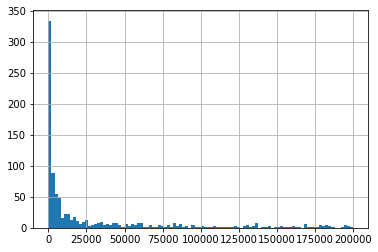

In [40]:
movies['box_office'].hist(bins=100, range=(0, 200000));

Очень много странных околонулевых значений. Если рассмотреть такие значения конкретно в эту категорию попадают как очень кассовые фильмы, так и документальные фильмы с действительно низкими сборами. Хорошо было бы связаться с составителями данных, но это невозможно. Оставим эти данные нетронутыми, поскольку сложно решить, что именно с этим делать.

**Вывод**

Были проверены численные значения, исправлены значения в столбце `budget`. Есть проблемы со столбцом `box_office`, но поправить эти аномальные значения невозможно. 

#### Шаг 2.5. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим явные дубликаты по всем столбцам.

In [85]:
movies.duplicated().sum()

0

Рассмотрим дубликаты по столбцу с номером прокатного удостверения, так как именно эти значения должны быть уникальными.

In [41]:
movies.duplicated('puNumber').sum()

2

Всего 2 дубликата. Удалим их.

In [42]:
movies = movies.drop_duplicates('puNumber')

In [43]:
movies.duplicated('puNumber').sum()

0

**Вывод**

Всего было два дубликата по номеру прокатного удостверения. Учитывая при этом, что явных дубликатов по всем столбцам нет, в этих двух записях разные данные соответствует одному прокатному удостверению. Так как таких дубликатов всего два, можно просто удалить их. Скрытых дубликатов нет, так как все категориальные значения уже проверены.

#### Шаг 2.6. Добавьте новые столбцы





In [44]:
movies['show_start_year'] = movies['show_start_date'].dt.year

In [45]:
movies['main_director'] = movies['director'].apply(lambda x: x.split(', ')[0])
movies['main_genres'] = movies['genres'].apply(lambda x: x.split(',')[0])

In [46]:
movies['support_to_budget_ratio'] = (movies['refundable_support'] + movies['nonrefundable_support']) / movies['budget']

**Вывод**

Требуемые столбцы добавлены.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [86]:
pivot_table_year = movies.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = 'count')
pivot_table_year.columns = ['films_count']
pivot_table_year

,films_count
show_start_year,
2010,105
2011,109
2012,128
2013,184
2014,278
2015,459
2016,523
2017,355
2018,471


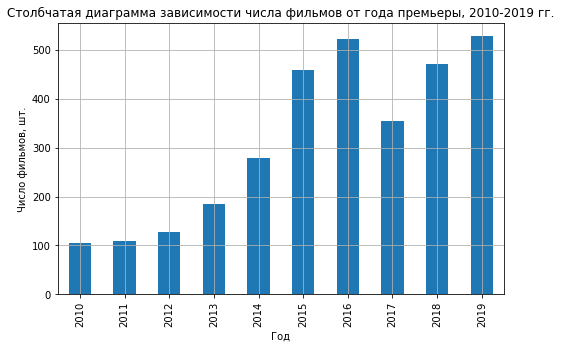

In [87]:
pivot_table_year.plot(y = 'films_count', kind = 'bar', grid=True, figsize=(8,5), legend=False)
plt.title('Столбчатая диаграмма зависимости числа фильмов от года премьеры, 2010-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Число фильмов, шт.');

Число фильмов, выходящих в прокат с 2010 по 2016 год росло, в 2017 году произошла просадка, а затем снова рост до 2019 года. Максимальное число фильмов вышло в 2019 году, а минимальное - в 2010 году.

In [49]:
movies['box_office'].count() / movies['title'].count()

0.42070720600053574

Фильмы с указанной информацией о прокате составляют 42% от общего числа прокатных удостверений. 

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [50]:
pivot_table_box_year = movies.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = 'sum')
pivot_table_box_year.columns = ['box_office_sum']
pivot_table_box_year

,box_office_sum
show_start_year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.434718e+09
2015,3.852783e+10
2016,4.674232e+10
2017,4.845815e+10
2018,4.925199e+10


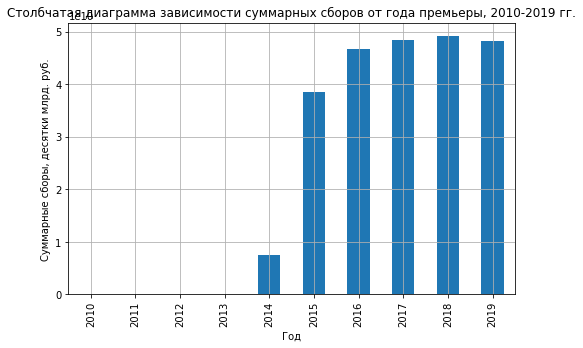

In [51]:
pivot_table_box_year.plot(y = 'box_office_sum', kind = 'bar', grid=True, figsize=(8,5), legend=False)
plt.title('Столбчатая диаграмма зависимости суммарных сборов от года премьеры, 2010-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Суммарные сборы, десятки млрд. руб.');

Суммарные сборы резко выросли с 2014 года и с 2016 года находятся примерно на одном уровне (эти данные нужно проверить, так как есть вероятность того, что фильмы до 2015 года имеют страные величины сборов, что было показано выше на этапе предобработки данных). Максимальная сумма сборов была в 2018 году, а минимальная в 2010.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [52]:
pivot_table_box_year = movies.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = ['mean', 'median'])
pivot_table_box_year.columns = ['box_office_mean', 'box_office_median']
pivot_table_box_year

,box_office_mean,box_office_median
show_start_year,,
2010,2.313004e+04,1700.00
2011,1.293832e+05,3000.00
2012,5.433924e+04,5660.00
2013,1.619549e+05,3522.50
2014,2.674359e+07,18137.50
2015,8.393862e+07,4784781.50
2016,8.937345e+07,3776087.56
2017,1.365018e+08,9919415.00
2018,1.045690e+08,8751895.75


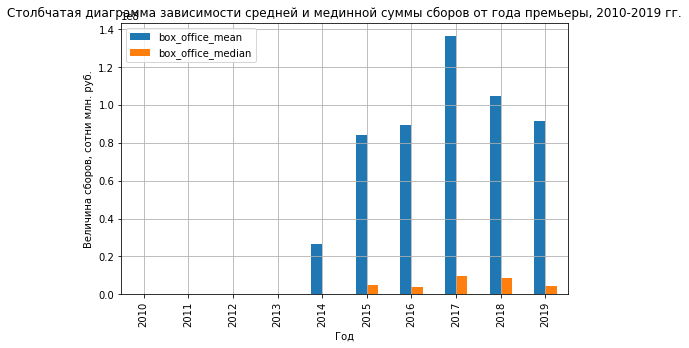

In [53]:
pivot_table_box_year.plot(y = ['box_office_mean','box_office_median'], kind = 'bar', grid=True, figsize=(8,5), legend=True)
plt.title('Столбчатая диаграмма зависимости средней и мединной суммы сборов от года премьеры, 2010-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Величина сборов, сотни млн. руб.');

Медианное и среднее значение значительно отличается друг от друга из-за большого количества выбросов в сборах (крупнобюджетных фильмов очень мало, а собирают они очень много, отсюда такой разрыв).

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [54]:
movies_2015 = movies[movies['show_start_year'] == 2015]
pivot_table_box_age_restriction = movies_2015.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = ['mean', 'median'])
pivot_table_box_age_restriction.columns = ['box_office_mean', 'box_office_median']
pivot_table_box_age_restriction

,box_office_mean,box_office_median
age_restriction,,
«0+» - для любой зрительской аудитории,9.719348e+06,2943318.70
«12+» - для детей старше 12 лет,1.863821e+08,15144119.40
«16+» - для детей старше 16 лет,6.534303e+07,4321194.60
«18+» - запрещено для детей,4.145306e+07,4654761.40
«6+» - для детей старше 6 лет,1.637945e+08,19513253.93


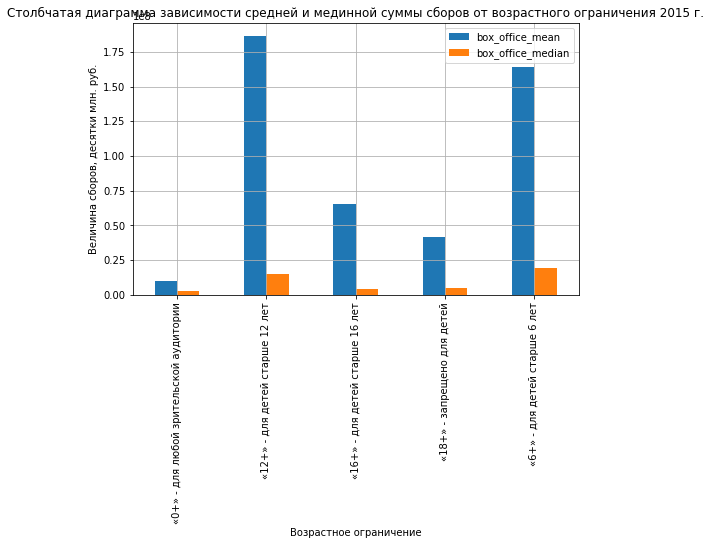

In [55]:
pivot_table_box_age_restriction.plot(y = ['box_office_mean','box_office_median'], kind = 'bar', grid=True, figsize=(8,5), legend=True)
plt.title('Столбчатая диаграмма зависимости средней и мединной суммы сборов от возрастного ограничения 2015 г.')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Величина сборов, десятки млн. руб.');

In [56]:
movies_2016 = movies[movies['show_start_year'] == 2016]
pivot_table_box_age_restriction = movies_2016.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = ['mean', 'median'])
pivot_table_box_age_restriction.columns = ['box_office_mean', 'box_office_median']
pivot_table_box_age_restriction

,box_office_mean,box_office_median
age_restriction,,
«0+» - для любой зрительской аудитории,3.664118e+06,2571294.100
«12+» - для детей старше 12 лет,1.393845e+08,4225478.260
«16+» - для детей старше 16 лет,9.168094e+07,5085192.980
«18+» - запрещено для детей,4.499291e+07,6107001.740
«6+» - для детей старше 6 лет,1.721878e+08,3026256.145


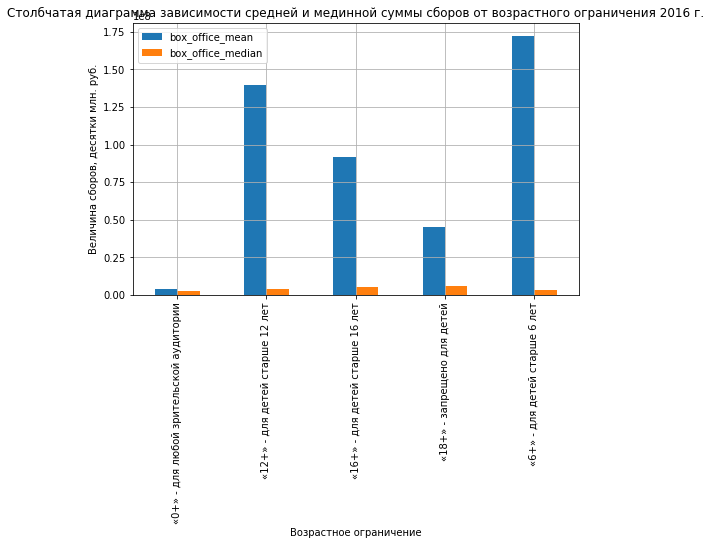

In [57]:
pivot_table_box_age_restriction.plot(y = ['box_office_mean','box_office_median'], kind = 'bar', grid=True, figsize=(8,5), legend=True)
plt.title('Столбчатая диаграмма зависимости средней и мединной суммы сборов от возрастного ограничения 2016 г.')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Величина сборов, десятки млн. руб.');

In [58]:
movies_2017 = movies[movies['show_start_year'] == 2017]
pivot_table_box_age_restriction = movies_2017.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = ['mean', 'median'])
pivot_table_box_age_restriction.columns = ['box_office_mean', 'box_office_median']
pivot_table_box_age_restriction

,box_office_mean,box_office_median
age_restriction,,
«0+» - для любой зрительской аудитории,7.653298e+07,22178956.0
«12+» - для детей старше 12 лет,1.914982e+08,9010548.0
«16+» - для детей старше 16 лет,1.557883e+08,9641407.5
«18+» - запрещено для детей,6.565643e+07,8212677.0
«6+» - для детей старше 6 лет,2.734326e+08,50274982.0


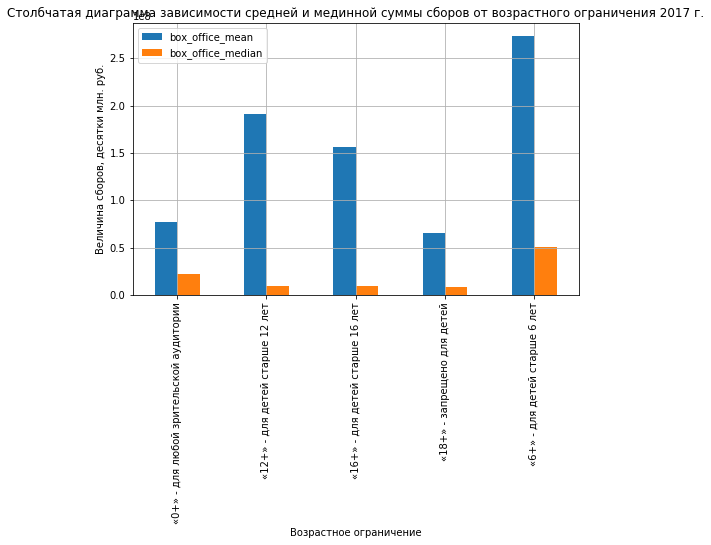

In [59]:
pivot_table_box_age_restriction.plot(y = ['box_office_mean','box_office_median'], kind = 'bar', grid=True, figsize=(8,5), legend=True)
plt.title('Столбчатая диаграмма зависимости средней и мединной суммы сборов от возрастного ограничения 2017 г.')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Величина сборов, десятки млн. руб.');

In [60]:
movies_2018 = movies[movies['show_start_year'] == 2018]
pivot_table_box_age_restriction = movies_2018.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = ['mean', 'median'])
pivot_table_box_age_restriction.columns = ['box_office_mean', 'box_office_median']
pivot_table_box_age_restriction

,box_office_mean,box_office_median
age_restriction,,
«0+» - для любой зрительской аудитории,6.489800e+06,3616937.28
«12+» - для детей старше 12 лет,2.129447e+08,8931965.66
«16+» - для детей старше 16 лет,1.050220e+08,8751895.75
«18+» - запрещено для детей,4.893903e+07,7179466.00
«6+» - для детей старше 6 лет,1.525194e+08,14458669.43


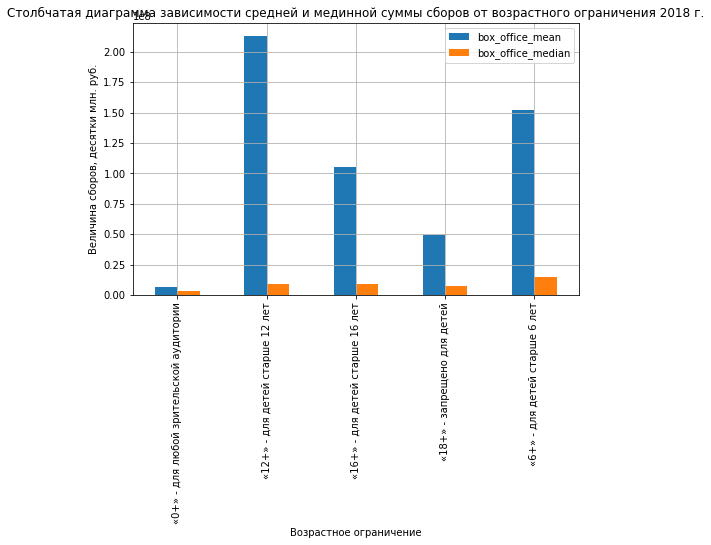

In [61]:
pivot_table_box_age_restriction.plot(y = ['box_office_mean','box_office_median'], kind = 'bar', grid=True, figsize=(8,5), legend=True)
plt.title('Столбчатая диаграмма зависимости средней и мединной суммы сборов от возрастного ограничения 2018 г.')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Величина сборов, десятки млн. руб.');

In [62]:
movies_2019 = movies[movies['show_start_year'] == 2019]
pivot_table_box_age_restriction = movies_2019.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = ['mean', 'median'])
pivot_table_box_age_restriction.columns = ['box_office_mean', 'box_office_median']
pivot_table_box_age_restriction

,box_office_mean,box_office_median
age_restriction,,
«0+» - для любой зрительской аудитории,5.915356e+06,3885434.50
«12+» - для детей старше 12 лет,1.491788e+08,3405545.76
«16+» - для детей старше 16 лет,7.164842e+07,3210717.81
«18+» - запрещено для детей,5.531036e+07,5603216.55
«6+» - для детей старше 6 лет,1.588118e+08,12525531.67


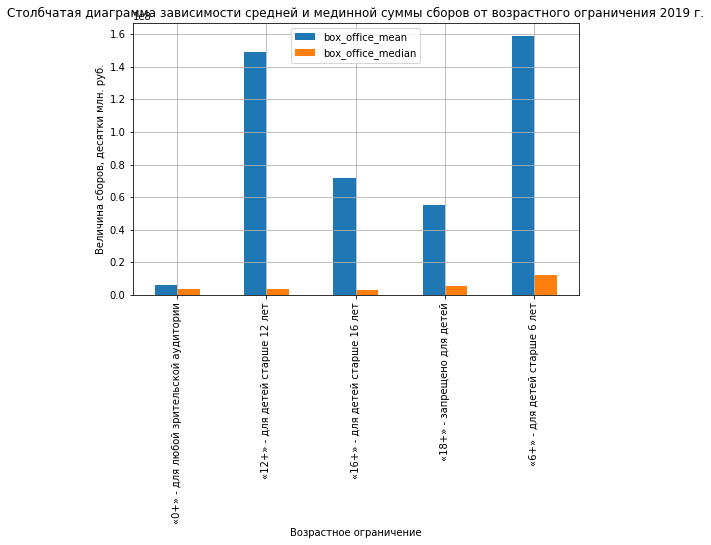

In [63]:
pivot_table_box_age_restriction.plot(y = ['box_office_mean','box_office_median'], kind = 'bar', grid=True, figsize=(8,5), legend=True)
plt.title('Столбчатая диаграмма зависимости средней и мединной суммы сборов от возрастного ограничения 2019 г.')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Величина сборов, десятки млн. руб.');

In [114]:
pivot_table_box_age_restriction = movies.pivot_table(index = 'show_start_year', columns = 'age_restriction', values = 'box_office')
pivot_table_box_age_restriction = pivot_table_box_age_restriction.loc[2014:, :]
pivot_table_box_age_restriction

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2014,9.883217e+06,3.077122e+07,6.593161e+06,4.910473e+07,5.768715e+07
2015,9.719348e+06,1.863821e+08,6.534303e+07,4.145306e+07,1.637945e+08
2016,3.664118e+06,1.393845e+08,9.168094e+07,4.499291e+07,1.721878e+08
2017,7.653298e+07,1.914982e+08,1.557883e+08,6.565643e+07,2.734326e+08
2018,6.489800e+06,2.129447e+08,1.050220e+08,4.893903e+07,1.525194e+08
2019,5.915356e+06,1.491788e+08,7.164842e+07,5.531036e+07,1.588118e+08


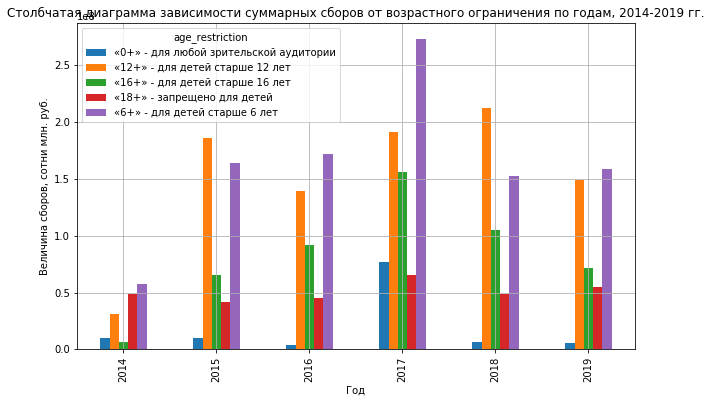

In [115]:
pivot_table_box_age_restriction.plot(y = pivot_table_box_age_restriction.columns, kind = 'bar', grid=True, figsize=(10,6), legend=True, xlim=(2014, 2019))
plt.title('Столбчатая диаграмма зависимости суммарных сборов от возрастного ограничения по годам, 2014-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Величина сборов, сотни млн. руб.');

**Вывод**

Мы рассмотрели влияние возрастного ограничения аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. В среднем сборы фильмов с возрастным ограничением «12+» и «6+» выше остальных. Лидер год от года меняется, но связано это скорее всего с конкретными премьерами в году. В целом результат предсказуемый, поскольку наиболее крупная аудитория кинотеатров - это семейные люди с детьми 6-16 лет, которые не идут на фильмы с высоким возрастным ограничением («16+» и «18+») и не идут на фильмы с совсем уж низким ограничением «0+», которые зачастую для взрослых и детей постарше слишком уж простые.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [64]:
movies_with_state_support = movies[(movies['refundable_support'] + movies['nonrefundable_support']) > 0]

Создадим столбец с суммарной величиной поддержки

In [65]:
# Убрать ложное срабатывание SettingWithCopyWarning
pd.options.mode.chained_assignment = None
movies_with_state_support['support'] = movies_with_state_support['refundable_support'] + movies_with_state_support['nonrefundable_support']
pd.options.mode.chained_assignment = 'warn'

Общее число фильмов в датафрейме, получивших государственную поддержку

In [66]:
len(movies_with_state_support)

315

Рассмотрим распределение по годам

In [67]:
pivot_table_year = movies_with_state_support.pivot_table(index = 'show_start_year', values = 'title', aggfunc = 'count')
pivot_table_year.columns = ['films_count']
pivot_table_year

,films_count
show_start_year,
2013,2
2014,15
2015,80
2016,58
2017,39
2018,52
2019,69


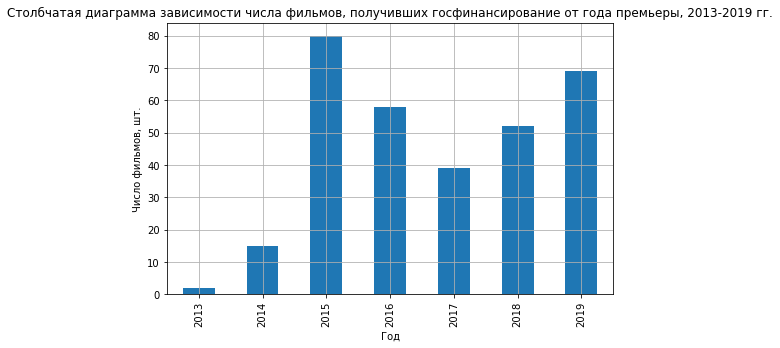

In [68]:
pivot_table_year.plot(y = 'films_count', kind = 'bar', grid=True, figsize=(8,5), legend=False)
plt.title('Столбчатая диаграмма зависимости числа фильмов, получивших госфинансирование от года премьеры, 2013-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Число фильмов, шт.');

Максимальное число фильмов, получивших государственную поддержку в 2015 году. Затем произошел спад к 2017 году и новый рост.

Рассмотрим общую сумму государственной поддержки

In [69]:
pivot_table_year = movies_with_state_support.pivot_table(index = 'show_start_year', values = 'support', aggfunc = 'sum')
pivot_table_year.columns = ['support_sum']
pivot_table_year

,support_sum
show_start_year,
2013,1.343479e+08
2014,5.490023e+08
2015,3.227241e+09
2016,3.977155e+09
2017,3.098972e+09
2018,3.098000e+09
2019,4.724000e+09


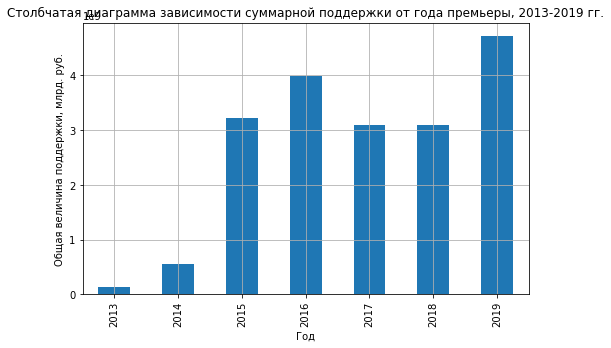

In [70]:
pivot_table_year.plot(y = 'support_sum', kind = 'bar', grid=True, figsize=(8,5), legend=False)
plt.title('Столбчатая диаграмма зависимости суммарной поддержки от года премьеры, 2013-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Общая величина поддержки, млрд. руб.');

Общая величина господдержки достигла максимума в 2019 году.

Рассмотрим динамику сборов по годам

In [71]:
pivot_table_box_year = movies_with_state_support.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = 'sum')
pivot_table_box_year.columns = ['box_office_sum']
pivot_table_box_year

,box_office_sum
show_start_year,
2013,2.032239e+07
2014,1.007188e+09
2015,4.815747e+09
2016,4.957724e+09
2017,1.075952e+10
2018,9.517657e+09
2019,8.262021e+09


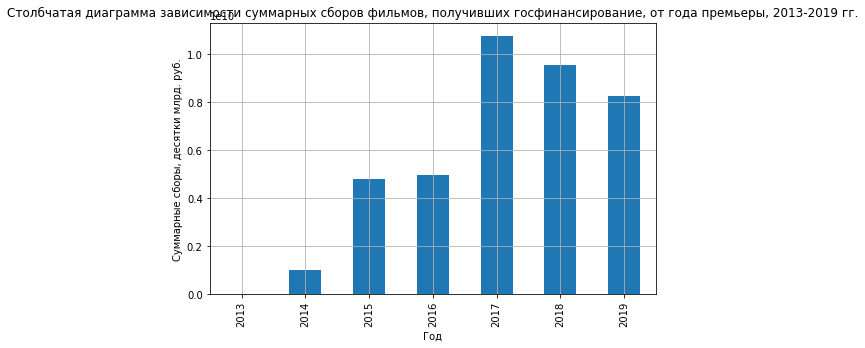

In [72]:
pivot_table_box_year.plot(y = 'box_office_sum', kind = 'bar', grid=True, figsize=(8,5), legend=False)
plt.title('Столбчатая диаграмма зависимости суммарных сборов фильмов, получивших госфинансирование, от года премьеры, 2013-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Суммарные сборы, десятки млрд. руб.');

Максимальные сборы фильмов, получивших государственную поддержку, зафиксированы в 2017 году. Необходимо заметить, что в этом же году зафиксировано наименьшее количество фильмов, получивших господдержку и некоторый спад общей суммы поддержки. Скорее всего это связано с ужесточением правил выдачи господдержки, что увеличило общее качество фильмов, на которые были выделены деньги. Можно заметить, что не смотря на увеличение общей суммы господдержки и числа фильмов, на которые были выделены деньги, суммарные сборы уменьшились. То есть общая эффективность вложенных средств уменьшилась.

Сравним предыдущие графики с бюджетом и проверем окупаемость таких фильмов в целом.

In [73]:
movies_with_state_support_profit = movies_with_state_support[movies_with_state_support['budget'] < movies_with_state_support['box_office']]
len(movies_with_state_support_profit) / len(movies_with_state_support)

0.20952380952380953

Доля окупившихся фильмов из общего числа, получивших господдержку около 21%. Даже учитывая наличие в общем числе некоммерческих проектов (социально значимое кино, артхаус, документальные фильмы и т.д.), значение довольно низкое. К сожалению сравнить этот показатель с фильмами, не получившими государственную поддержку, невозможно, поскольку данные почти все данные по бюджету даны для фильмов с господдержкой.

In [74]:
pivot_table_budget_year = movies_with_state_support.pivot_table(index = 'show_start_year', values = 'budget', aggfunc = 'sum')
pivot_table_budget_year.columns = ['budget_sum']
pivot_table_budget_year

,budget_sum
show_start_year,
2013,2.554354e+08
2014,1.279485e+09
2015,7.309669e+09
2016,7.228943e+09
2017,6.972173e+09
2018,6.651695e+09
2019,1.254287e+10


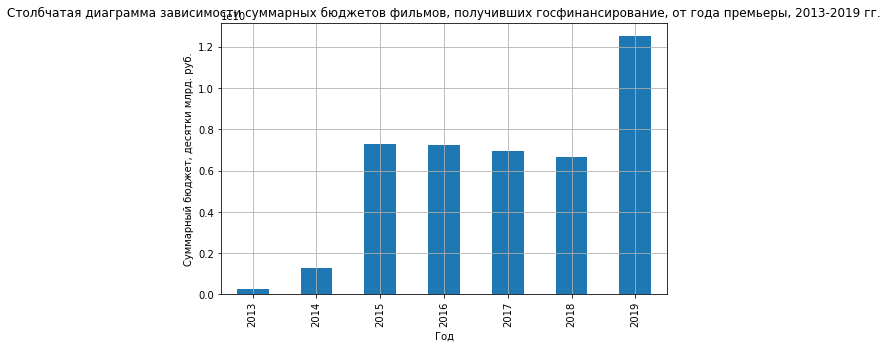

In [75]:
pivot_table_budget_year.plot(y = 'budget_sum', kind = 'bar', grid=True, figsize=(8,5), legend=False)
plt.title('Столбчатая диаграмма зависимости суммарных бюджетов фильмов, получивших госфинансирование, от года премьеры, 2013-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Суммарный бюджет, десятки млрд. руб.');

В целом можно увидеть, что качественно график повторяет график с суммарной поддержкой, причем поддержка составляет довольно большую долю от общего бюджета. Опять же стоит повторить, что сборы при этом упали, что говорит о тенденции к ухудшению качества фильмов, несмотря на увеличение финансирования.

Рассмотрим распределение фильмов, получивших государственную поддержку в зависимости от их рейтинга.

In [76]:
pivot_table_ratings = movies_with_state_support.pivot_table(index = 'ratings', values = 'title', aggfunc = 'count')
pivot_table_ratings.columns = ['films_count']
pivot_table_ratings

,films_count
ratings,
1.0,1
2.5,1
2.8,1
2.9,2
3.0,1
3.1,1
3.2,4
3.3,1
3.5,1


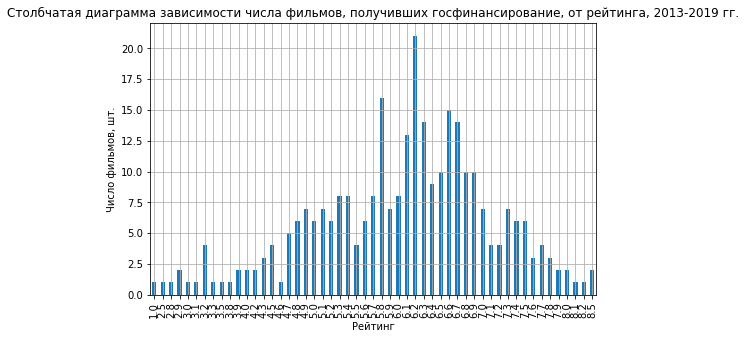

In [77]:
pivot_table_ratings.plot(y = 'films_count', kind = 'bar', grid=True, figsize=(8,5), legend=False)
plt.title('Столбчатая диаграмма зависимости числа фильмов, получивших госфинансирование, от рейтинга, 2013-2019 гг.')
plt.xlabel('Рейтинг')
plt.ylabel('Число фильмов, шт.');

In [78]:
pivot_table_ratings = movies_with_state_support.pivot_table(index = 'show_start_year', values = 'ratings', aggfunc = ['median', 'mean'])
pivot_table_ratings.columns = ['rating_median', 'rating_mean']
pivot_table_ratings

,rating_median,rating_mean
show_start_year,,
2013,6.70,6.700000
2014,6.35,5.964286
2015,6.20,6.061333
2016,5.90,5.692593
2017,6.20,6.054054
2018,6.30,6.042000
2019,6.15,6.175758


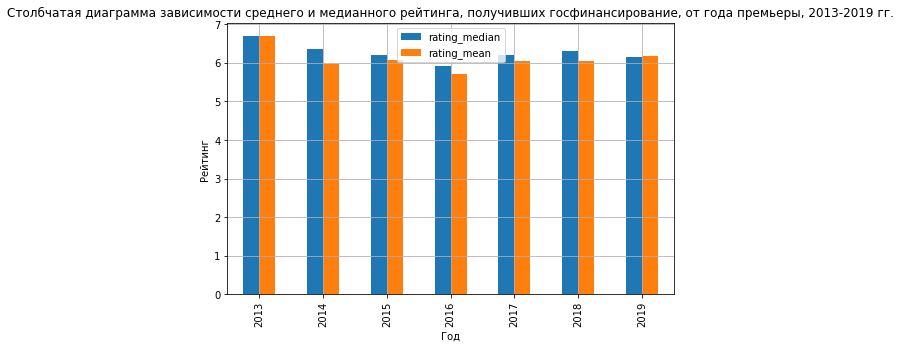

In [79]:
pivot_table_ratings.plot(y = ['rating_median', 'rating_mean'], kind = 'bar', grid=True, figsize=(8,5), legend=True)
plt.title('Столбчатая диаграмма зависимости среднего и медианного рейтинга, получивших госфинансирование, от года премьеры, 2013-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Рейтинг');

In [80]:
movies_with_state_support['ratings'].median()

6.2

In [81]:
movies_with_state_support['ratings'].mean()

6.015436241610738

Среднее значение рейтинга по фильмам, получивших господдержку равно 6,02, медианное значение - 6,2. По графику можно видеть снижение среднего рейтинга к 2016 году, а затем рост с небольшим снижением в 2019 году.

Построим такой же график для всех фильмов.

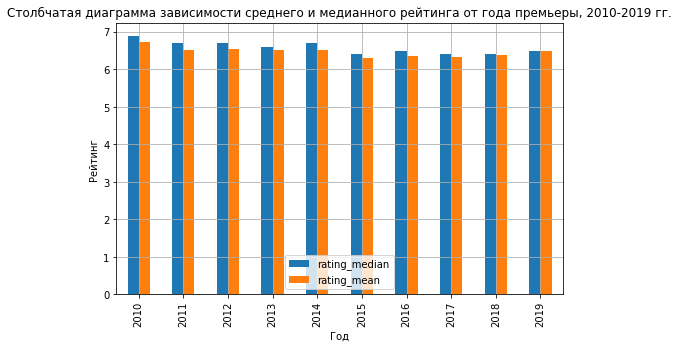

In [82]:
pivot_table_ratings = movies.pivot_table(index = 'show_start_year', values = 'ratings', aggfunc = ['median', 'mean'])
pivot_table_ratings.columns = ['rating_median', 'rating_mean']
pivot_table_ratings.plot(y = ['rating_median', 'rating_mean'], kind = 'bar', grid=True, figsize=(8,5), legend=True)
plt.title('Столбчатая диаграмма зависимости среднего и медианного рейтинга от года премьеры, 2010-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Рейтинг');

In [83]:
movies['ratings'].median()

6.6

In [84]:
movies['ratings'].mean()

6.480886897404202

Можно сделать вывод о том, что в среднем рейтинги фильмов, получающих госфинансирование ниже общих рейтингов (это связано с тем, что в среднем иностранные картины, попадающие на российский рынок имеют довольно высокое качество, иначе у них не было бы такого широкого проката).

### Шаг 5. Напишите общий вывод

1. Был исследован рынок российского кинопроката; 
2. Оценены данные в целом, определены пропущенные значения. В случае наличия логичной замены эти пропуски были заполнены; Остальные остались нетронутыми, чтобы не повлиять на результат исследования;
3. Изменены типы данных в соответствии с логикой данных в столбцах;
4. Таблица была дополнена необходимыми для исследования столбцами;
5. Были исследованы распределения параметров, построены гистограммы общего числа фильмов по годам, оценена динамика проката по годам, а также изучено влияние возрастного рейтинга на сборы;
6. Был исследован рынок фильмов, получивших господдержку, рассмотрено распределение их количества по годам, суммарной величины господдержки по годам, суммарных сборов этих фильмов по годам, оценена их окупаемость (21%), построены столбчатые диаграммы распределения по рейтингу и диаграммы зависимости среднего и медианного рейтингов по годам для фильмов, получивших господдержку, и всего рынка.
7. Можно сделать вывод о том, что качество фильмов с 2017 года несколько снизилось, что говорит о проблемах в системе адресной поддержки кинокартин. Уменьшилась величина общих сборов, хотя суммарная величина поддержки увеличилась Кроме того, средний рейтинг фильмов, получивших господдержку, ниже среднего по рынку, что говорит о том, что российский рынок все ещё отстает от западного (господдержку получают в подавляющем большинстве российские кинокартины, тогда как общий рынок содержит в себе и иностранные картины).